In [9]:
import tensorflow as tf
from models import PoissonPinn
from plots import plot_poisson_model, plot_training_loss
from data import simulate_poisson
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 4

def u(x):
  return tf.sin(np.pi * a * x)

def u_xx(x): # rhs function
  return -(np.pi * a)**2 * tf.sin(np.pi * a * x)

In [3]:
(x_eqn, rhs_eqn), (x_bnd, u_bnd) = simulate_poisson(1000, u_xx, u)

2022-10-30 19:01:51.149161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 19:01:51.495489: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 19:01:51.496217: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 19:01:51.521402: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [4]:
network = PoissonPinn.build_network([32, 64])

In [5]:
model = PoissonPinn(network)

In [6]:
model.compile()

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [8]:
history = model.fit(tf.stack([x_eqn, x_bnd], axis=0), tf.stack([rhs_eqn, u_bnd], axis=0), optimizer=optimizer, epochs=5000, progress_interval=200)

Epoch: 0 Loss: 13004.1055 Total Elapsed Time: 3.19
Epoch: 200 Loss: 11698.5967 Total Elapsed Time: 5.41
Epoch: 400 Loss: 287.4847 Total Elapsed Time: 7.49
Epoch: 600 Loss: 147.1522 Total Elapsed Time: 9.60
Epoch: 800 Loss: 27.2774 Total Elapsed Time: 11.71
Epoch: 1000 Loss: 4.0836 Total Elapsed Time: 13.75
Epoch: 1200 Loss: 0.5076 Total Elapsed Time: 15.74
Epoch: 1400 Loss: 0.2248 Total Elapsed Time: 17.77
Epoch: 1600 Loss: 0.1591 Total Elapsed Time: 19.75
Epoch: 1800 Loss: 0.1234 Total Elapsed Time: 21.74
Epoch: 2000 Loss: 0.1017 Total Elapsed Time: 23.77
Epoch: 2200 Loss: 0.0879 Total Elapsed Time: 25.82
Epoch: 2400 Loss: 0.0787 Total Elapsed Time: 27.85
Epoch: 2600 Loss: 0.0721 Total Elapsed Time: 29.87
Epoch: 2800 Loss: 0.0668 Total Elapsed Time: 31.85
Epoch: 3000 Loss: 0.0623 Total Elapsed Time: 33.88
Epoch: 3200 Loss: 0.0582 Total Elapsed Time: 35.88
Epoch: 3400 Loss: 0.0683 Total Elapsed Time: 37.98
Epoch: 3600 Loss: 0.0514 Total Elapsed Time: 39.98
Epoch: 3800 Loss: 0.0486 Tota

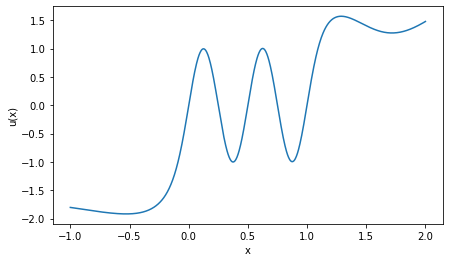

In [12]:
plot_poisson_model(model.network, -1, 3)

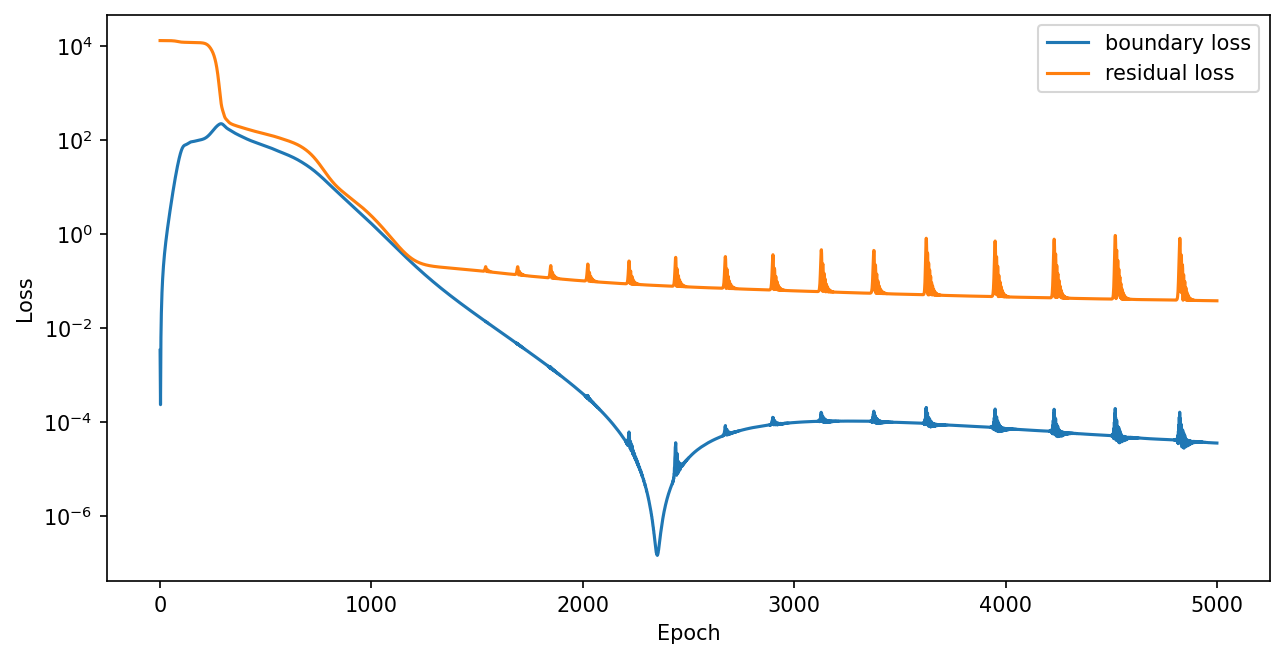

In [15]:
plot_training_loss(history, y_scale = "log")

In [52]:
(x_test, _), (_, _) = simulate_poisson(100, u_xx, u, random_seed=10)

In [53]:
u_test = u(x_test)

In [54]:
u_pred = model.network.predict(x_test)

In [55]:
from tensorflow.keras.metrics import MeanAbsoluteError, MeanRelativeError

In [56]:
mae = MeanAbsoluteError()
mre = MeanRelativeError(normalizer = u_test)

In [58]:
mae(u_test, u_pred), mre(u_test, u_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.002848107>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.0005578602>)